In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cpi
cpi.update()

In [2]:
df=pd.read_csv(r"C:\Users\Mustafe\Documents\Jupyter Stuff\Intro\archive\movies.csv",parse_dates=["released"],na_values={
    "rating": ["NOT RATED", "UNRATED","Not specified","TV-14","B","B15","TV-MA","TV-PG"],
    "budget": [0]
})
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [3]:
df.shape

(6820, 15)

In [4]:
df=df.dropna(how="any",subset=["budget","gross"])
df.shape

(4638, 15)

In [5]:
df["Adj_budget"]=df.apply(lambda x: cpi.inflate(x["budget"],x["released"].year),axis=1)

In [6]:
df["Adj_gross"]=df.apply(lambda x: cpi.inflate(x["gross"],x["released"].year),axis=1)

In [7]:
df["Profit"]= df["Adj_gross"]-df["Adj_budget"]

In [8]:
df.drop(["director","star","writer","company"],axis=1)

,budget,country,genre,gross,name,rating,released,runtime,score,votes,year,Adj_budget,Adj_gross,Profit
0,8000000.0,USA,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,299174,1986,1.889131e+07,1.234722e+08,1.045809e+08
1,6000000.0,USA,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,264740,1986,1.416849e+07,1.656210e+08,1.514525e+08
2,15000000.0,USA,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,236909,1986,3.542121e+07,4.245837e+08,3.891625e+08
3,18500000.0,USA,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,540152,1986,4.368616e+07,2.010986e+08,1.574125e+08
4,9000000.0,USA,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,36636,1986,2.125273e+07,4.383874e+07,2.258601e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,3000000.0,Ireland,Comedy,14013564.0,Love & Friendship,PG,2016-06-03,90,6.5,17862,2016,3.235043e+06,1.511149e+07,1.187645e+07
6809,3800000.0,USA,Comedy,1016872.0,The Hollars,PG-13,2016-08-26,88,6.5,7227,2016,4.097721e+06,1.096542e+06,-3.001180e+06
6811,8500000.0,USA,Animation,19985196.0,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,4556,2016,9.165956e+06,2.155099e+07,1.238503e+07
6814,20000000.0,USA,Action,36874745.0,Risen,PG-13,2016-02-19,107,6.3,19084,2016,2.156695e+07,3.976380e+07,1.819684e+07


A look into which genre generates the greatest average profit. 

In [105]:
g=df.groupby("genre")

In [106]:
for genre,genre_df in g:
    print(genre)
    print(len(genre_df))

Action
1099
Adventure
291
Animation
229
Biography
239
Comedy
1310
Crime
356
Drama
793
Family
6
Fantasy
29
Horror
228
Musical
1
Mystery
31
Romance
5
Sci-Fi
11
Thriller
8
Western
2


In [11]:
avg_profit = []
for genre,genre_df in g:
    if len(genre_df) > 10:
        avg_profit.append(genre_df["Profit"].sum()/len(genre_df))

In [86]:
genre_profit_labels=["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Fantasy","Horror","Mystery","Sci-Fi"]

<BarContainer object of 11 artists>

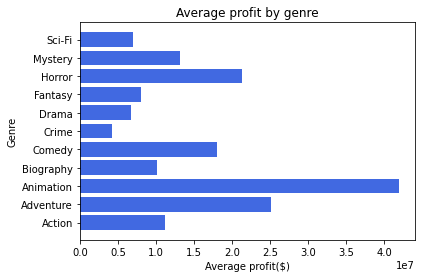

In [87]:
plt.xlabel("Average profit($)")
plt.ylabel("Genre")
plt.title("Average profit by genre")
plt.barh(genre_profit_labels,avg_profit,color="royalblue")

In [57]:
df["Profit"].describe()

count    4.638000e+03
mean     1.454050e+07
std      6.823788e+07
min     -1.994361e+08
25%     -1.632214e+07
50%     -4.717840e+05
75%      2.798915e+07
max      7.552614e+08
Name: Profit, dtype: float64

In [61]:
CV= df["Profit"].std()/df["Profit"].mean()
CV

4.692951572241206

The information gained from the describe of the profit column is quite telling with the standerd deviation being comparatively quite high and hence showing a very large spread of data. This is an expected result as it shows the volatilty of the movie industry and multiple different factors but it makes it more difficult to predict future success based on the data. The CV which is the coefficient of variance is very high and demonstrates this. An interesting consideration could be analysing whether the CV of variance is markedly difference for different genre of movie. 

In [100]:
CV_data=[]
for genre,genre_df in g:
    if len(genre_df) > 10:
        CV_data.append(genre_df["Profit"].std()/genre_df["Profit"].mean())

In [101]:
CV_labels=["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Fantasy","Horror","Mystery","Sci-Fi"]

<BarContainer object of 11 artists>

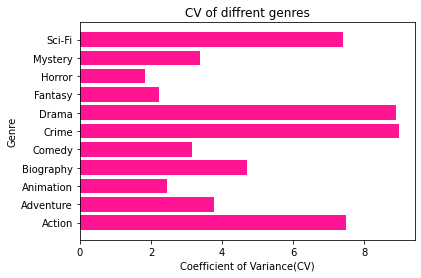

In [102]:
plt.xlabel("Coefficient of Variance(CV)")
plt.ylabel("Genre")
plt.title("CV of diffrent genres")
plt.barh(CV_labels,CV_data,color="deeppink")

This suggests the spread of animation and horror movies is much lower than drama and crime movies. This could be an important clue in predicting future box-office perfomance. Combined with the highest average profit, Animation movies are seeming increasingly attractive. Another possible method to analyse perfomance could be a Return of Investment, where we now consider the profit relative to the initial investment. 

In [103]:
df["ROI"]=df["Profit"]/df["Adj_budget"]

In [107]:
avg_ROI = []
for genre,genre_df in g:
    if len(genre_df) > 10:
        avg_ROI.append(genre_df["ROI"].sum()/len(genre_df))

In [109]:
ROI_labels=["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Fantasy","Horror","Mystery","Sci-Fi"]

<BarContainer object of 11 artists>

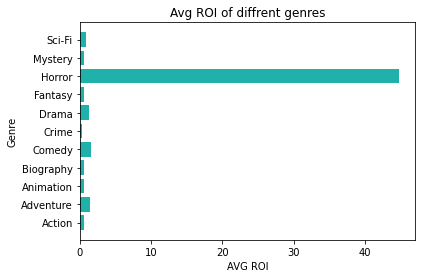

In [110]:
plt.xlabel("AVG ROI")
plt.ylabel("Genre")
plt.title("Avg ROI of diffrent genres")
plt.barh(ROI_labels,avg_ROI,color="lightseagreen")

The horror movie genre quite easily trumps this category due to its typically low budgets and high turnaround. In particular famous examples such as the Blair Witch Project & Paranormal Activity generated profits multiple times their initial outlay. To better picture the ROI values of the other genres I have redone the bar chart without horror in it.  

In [112]:
new_ROI=[]
for val in avg_ROI:
    if val < 10:
        new_ROI.append(val)

In [117]:
new_ROI_labels=["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Fantasy","Mystery","Sci-Fi"]

<BarContainer object of 10 artists>

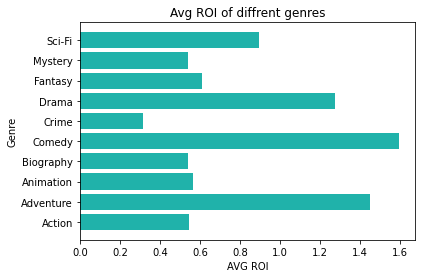

In [118]:
plt.xlabel("AVG ROI")
plt.ylabel("Genre")
plt.title("Avg ROI of diffrent genres")
plt.barh(new_ROI_labels,new_ROI,color="lightseagreen")

Movie-Rating Analysis

In [39]:
rating_count=list(df["rating"].value_counts())

In [40]:
rating_labels=["R","PG-13","PG","G","NC-17"]

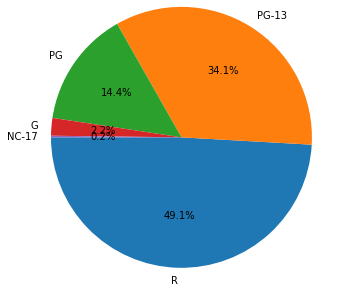

In [55]:
plt.axis("equal")
plt.pie(rating_count,labels=rating_labels,radius=1.5,autopct="%0.01f%%",startangle=180)
plt.show()

761208823.5294118